In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2stocks.csv to 2stocks.csv


In [ ]:
import pandas as pd
df=pd.read_csv("2stocks.csv")#
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df.shape
df.columns
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [ ]:
df. isnull().sum()#

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


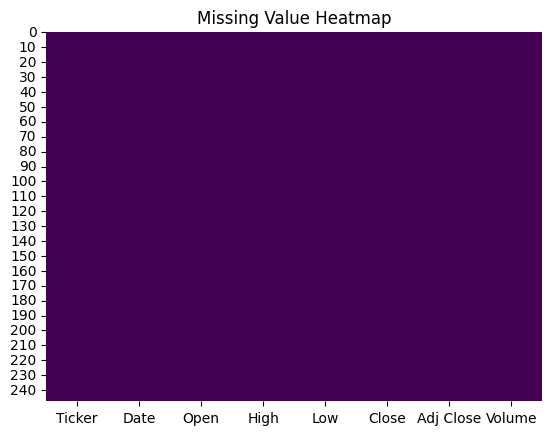

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

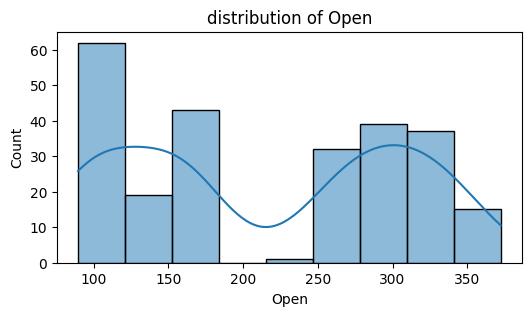

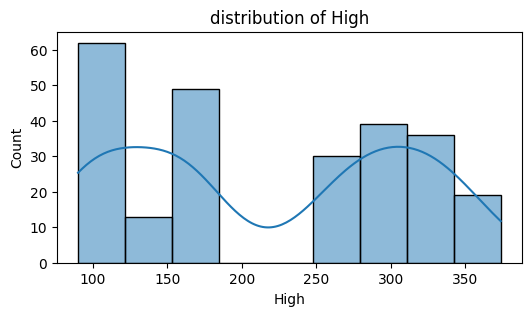

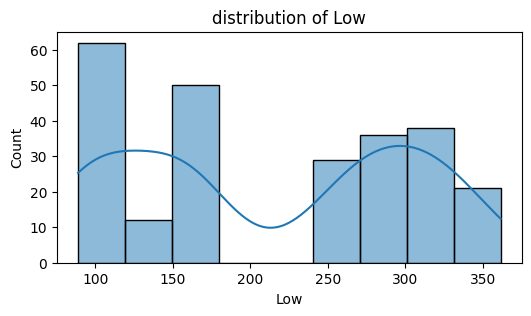

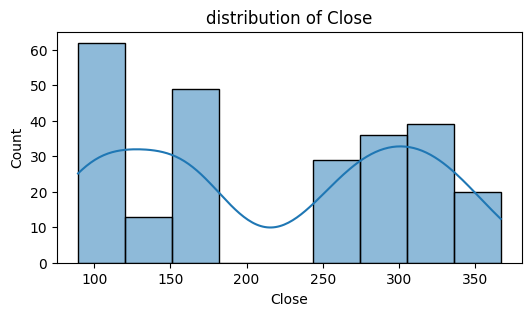

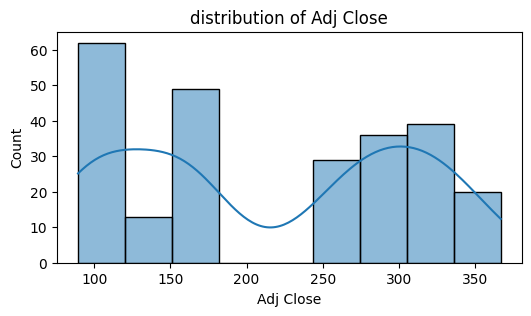

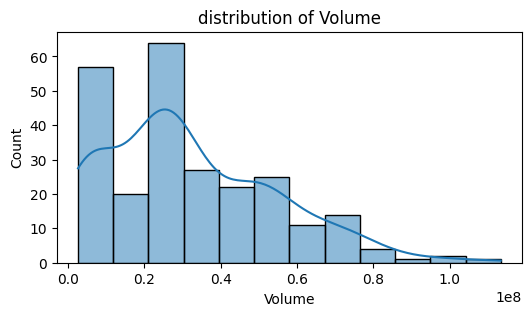

In [ ]:
num_cols=df.select_dtypes(include=np.number).columns
for col in num_cols:
  plt.figure(figsize=(6,3))
  sns.histplot(df[col],kde=True)
  plt.title(f'distribution of {col}')
  plt.show()

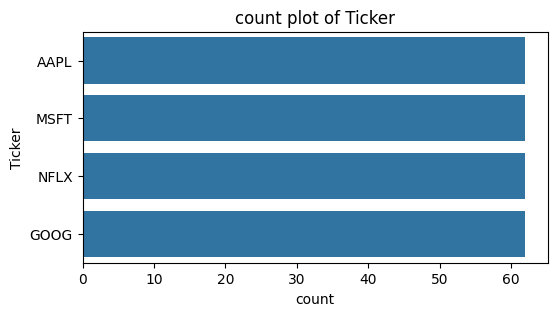

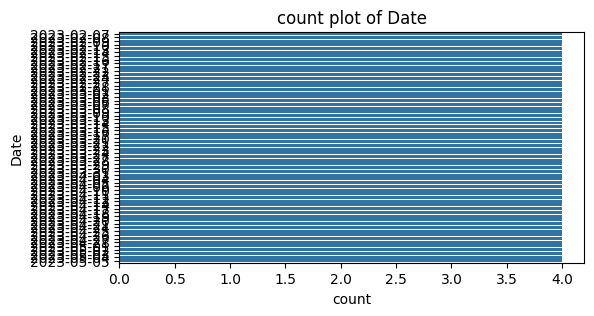

In [ ]:
cat_cols=df.select_dtypes(include='object').columns
for col in cat_cols:
  plt.figure(figsize=(6,3))
  sns.countplot(y=col,data=df,
                order=df[col].value_counts().index)
  plt.title(f'count plot of {col}')
  plt.show()


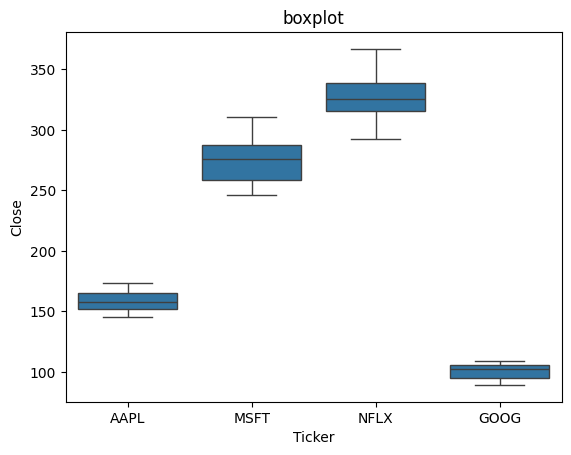

In [ ]:
sns.boxplot(x='Ticker',y='Close',data=df)
plt.title('boxplot')
plt.show()


In [ ]:
df.columns = df.columns.str.strip()
df.columns


Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [ ]:
currency_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in currency_cols:
    df[col] = df[col].astype(str).str.replace(r'[$,]', '', regex=True)
    df[col] = pd.to_numeric(df[col])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


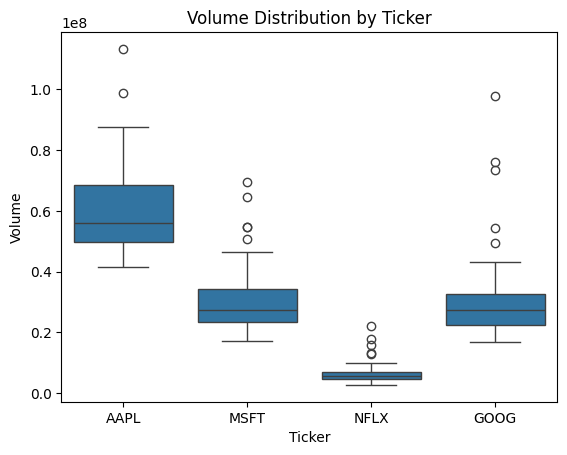

In [ ]:
sns.boxplot(x='Ticker', y='Volume', data=df)
plt.title('Volume Distribution by Ticker')
plt.show()

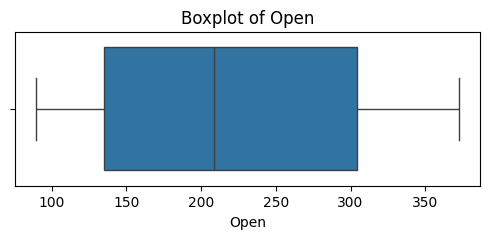

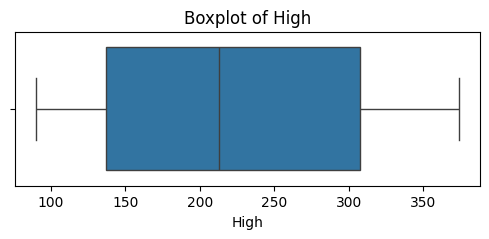

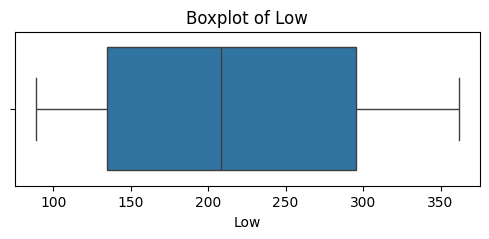

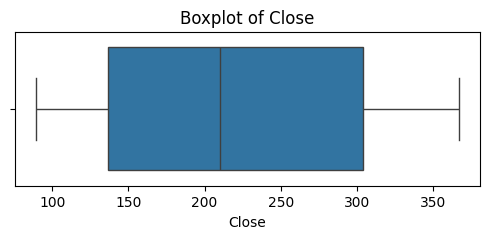

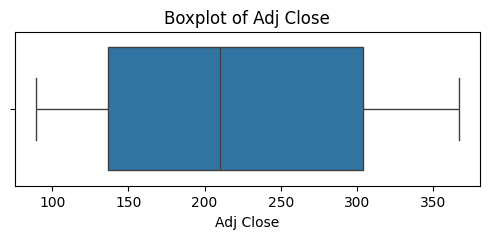

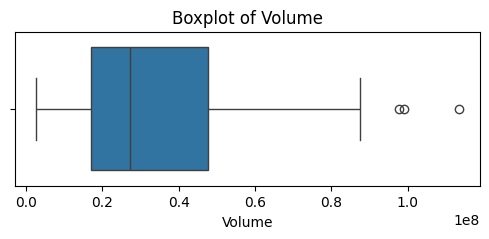

In [ ]:

for col in num_cols:
  plt.figure(figsize=(6,2))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [ ]:
df.columns = df.columns.str.strip()
df.columns


Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [ ]:
df.to_csv("cleaned_data.csv",index=False)

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB


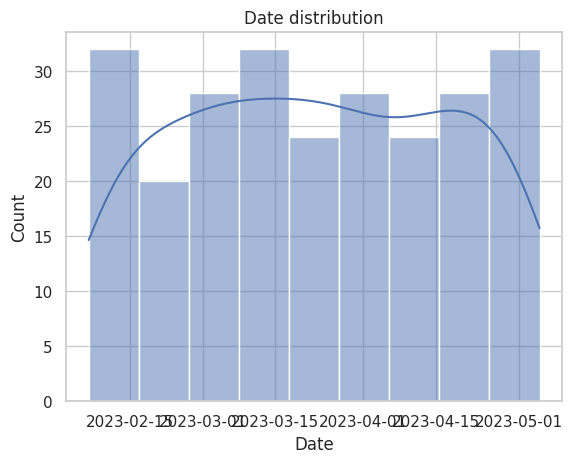

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set (style="whitegrid")
#example:histogram
sns.histplot(data=df,x='Date',kde=True)
plt.title('Date distribution')
plt.show()


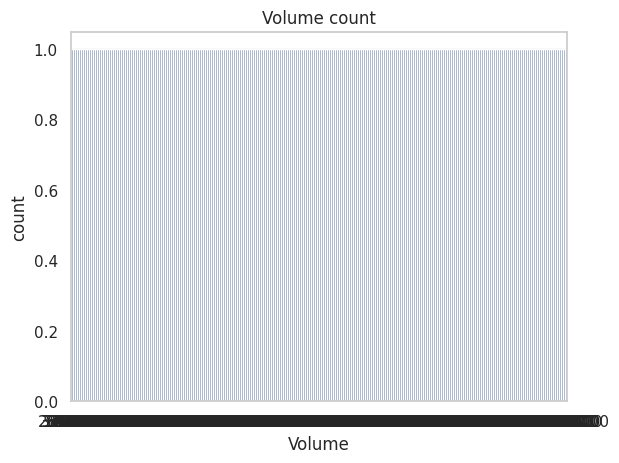

In [ ]:
#count plot
sns.countplot(data=df,x='Volume')
plt.title('Volume count')
plt.show()

In [ ]:
#convert date to time format
df['Date']= pd.to_datetime(df['Date'])
#sort data
df.sort_values(by='Date',inplace=True)


In [ ]:

df['Date']= pd.to_datetime(df['Date'])
#sort data
df.sort_values(by='Date',inplace=True)

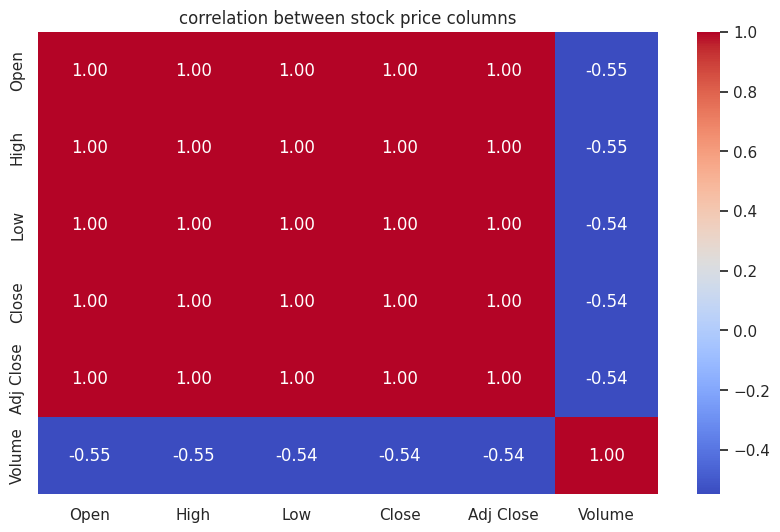

In [ ]:
plt.figure(figsize=(10,6))
price_cols=['Open','High','Low','Close','Adj Close','Volume']
sns.heatmap(df[price_cols].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("correlation between stock price columns")
plt.show()

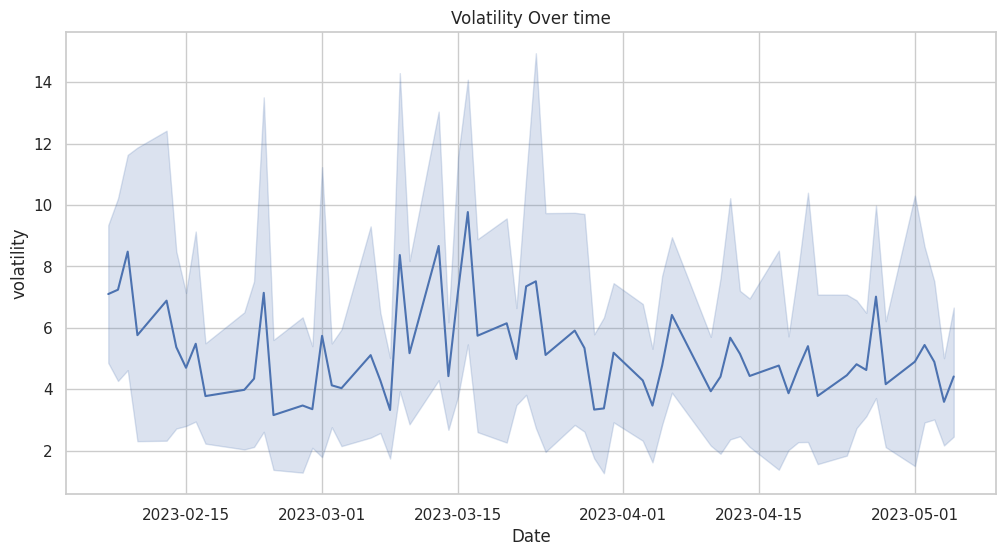

In [ ]:
df['price_change']=df['Close']-df['Open']
#daily percent return
df['Daily_Return']=df['Close'].pct_change()
#daily volatility(High-Low)
df['volatility']=df['High']-df['Low']
#plot volatility over time
plt.figure (figsize=(12,6))
sns.lineplot(x='Date',y='volatility',data=df)
plt.title("Volatility Over time")
plt.show()

In [ ]:

from scipy.stats import zscore
#zscore outlier detection
z_scores = zscore(df[['Volume','price_change','volatility']].dropna())
outliers = (np.abs(z_scores)>3)
print(f"Outliers found:{outliers.sum().sum()}")
#view outliers rows
df[outliers.any(axis=1)]

Outliers found:8


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,price_change,Daily_Return,volatility
127,NFLX,2023-02-10,359.160004,362.140015,347.140015,347.359985,347.359985,7291100,-11.800018,-0.041766,15.000000
135,NFLX,2023-02-23,331.230011,331.279999,314.299988,323.649994,323.649994,13238700,-7.580017,1.166332,16.980011
145,NFLX,2023-03-09,312.079987,312.510010,294.880005,297.779999,297.779999,7443400,-14.299988,0.180168,17.630005
154,NFLX,2023-03-22,306.309998,306.450012,293.540009,293.899994,293.899994,5808000,-12.410004,1.819996,12.910004
155,NFLX,2023-03-23,304.679993,322.779999,304.140015,320.369995,320.369995,15653300,15.690002,0.153821,18.639984
61,AAPL,2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400,2.590012,0.649748,3.540009


In [ ]:
df['MA_7']=df['Close'].rolling(window=7).mean()
df['MA_30']=df['Close'].rolling(window=30).mean()
#extract date features
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Dayofweek']=df['Date'].dt.dayofweek
#Volatility ratio(volatility relkative to price)
df['Volatility_ratio']=df['volatility']/df['Close']

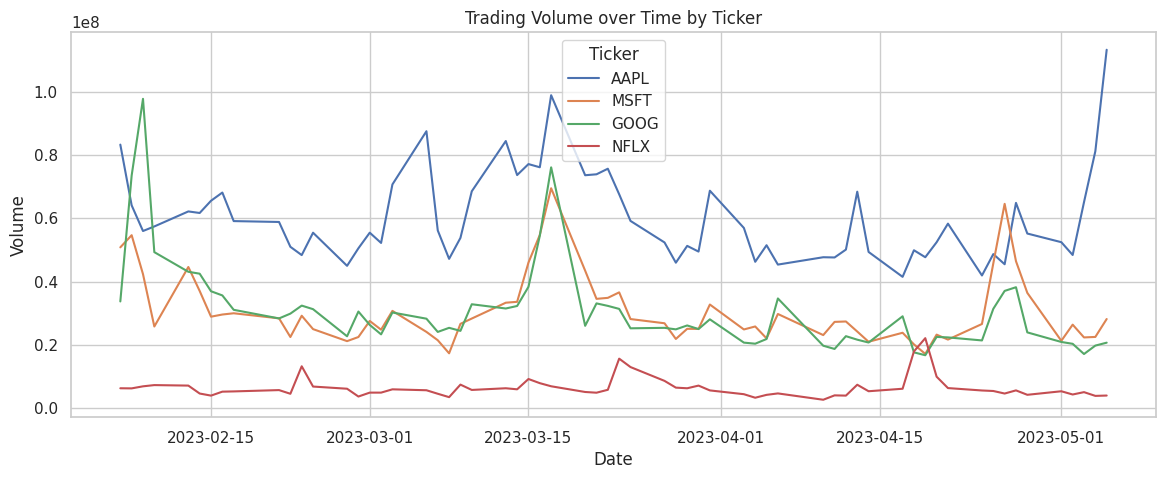

In [ ]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Date',y='Volume',hue='Ticker',data=df)
plt.title("Trading Volume over Time by Ticker")
plt.show()


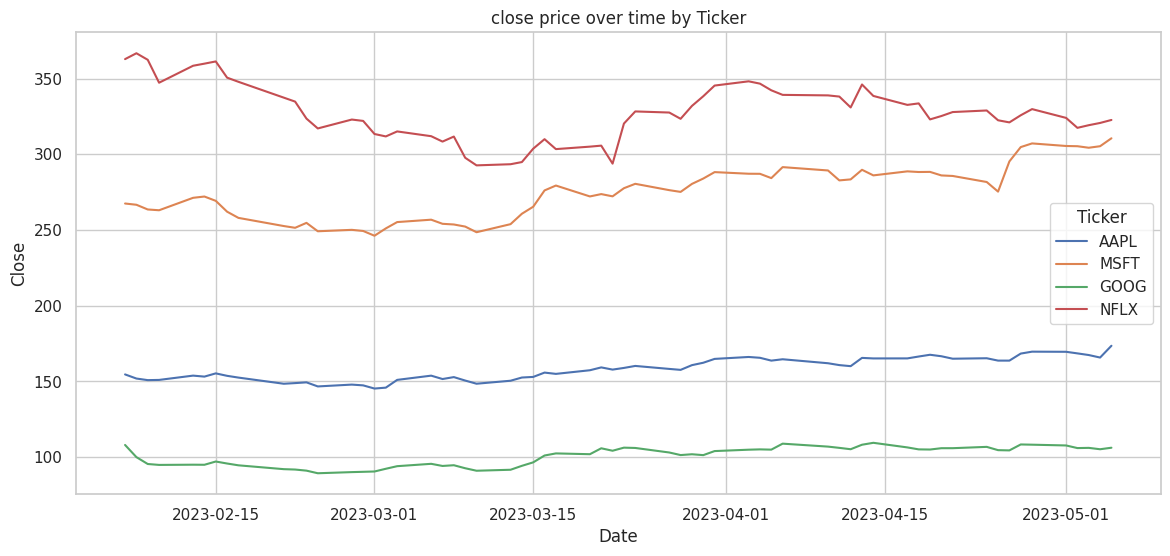

In [ ]:
plt.figure (figsize=(14,6))
sns.lineplot(x='Date',y='Close',hue='Ticker',data=df)
plt.title("close price over time by Ticker")
plt.show()

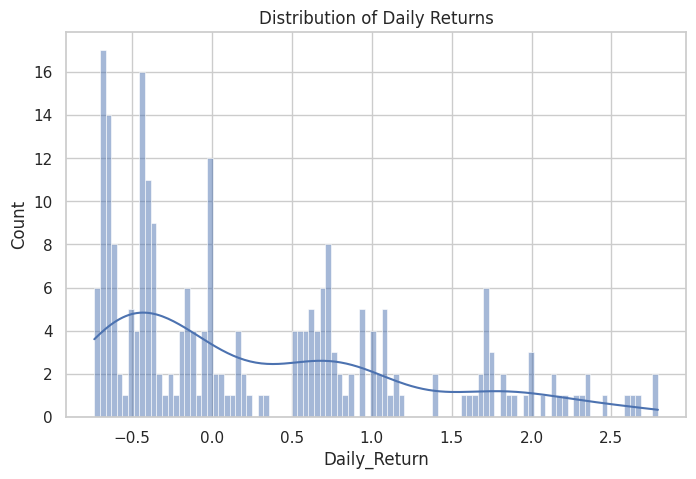

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Return'].dropna(),bins=100,kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

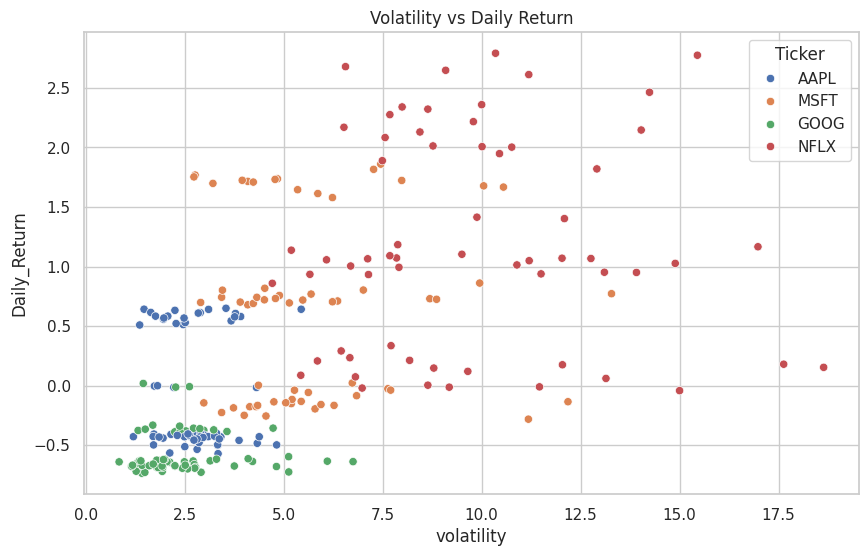

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='volatility',y='Daily_Return',hue='Ticker',data=df)
plt.title("Volatility vs Daily Return")
plt.show()

In [ ]:

files.download("2stocks.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>